# Predicting sales based on media investment

* Analyse dataset
* Create model to predict
* Train & test

## Advertising dataset

Let's take a look at this dataset.

This dataset has the amount of money invested by a particular company in advertising in different media (TV, Radio and Newspaper) and the sales got after investments. The idea is to create a model that allows to predict sales, and also to recognize if all media types are necessary or just some of them

In [90]:
import pandas as pd

In [91]:
data = pd.read_csv("Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [92]:
data.shape

(200, 4)

In [93]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [94]:
data.isna()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [95]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


Each feature of this dataset has all values, non NaN or null values. 
According to dataset, more money has been invested in TV advertising than other options. Let´s check if higher sales values were obtained when more money was put on TV.

Text(0, 0.5, 'Sales')

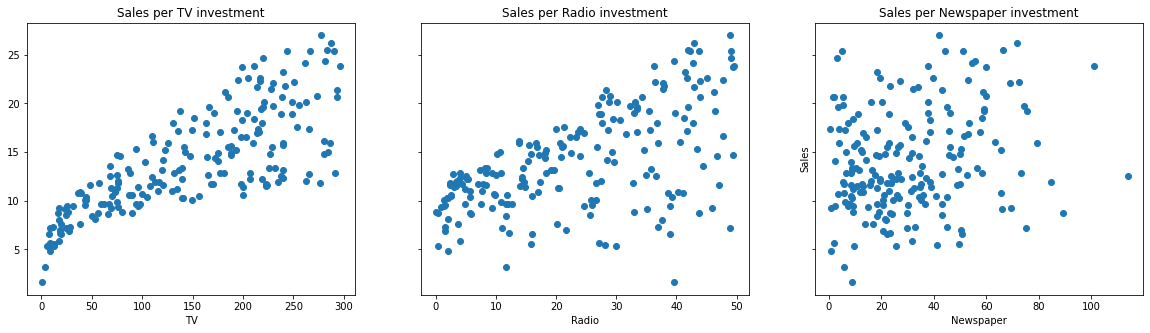

In [96]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
plt.title("Sales per TV investment")
ax1.scatter(data.TV,data.Sales)
ax2.scatter(data.Radio,data.Sales)
ax3.scatter(data.Newspaper,data.Sales)
ax1.set(xlabel="TV")
ax1.set_title("Sales per TV investment")
ax2.set(xlabel="Radio")
ax2.set_title("Sales per Radio investment")
ax3.set(xlabel="Newspaper")
ax3.set_title("Sales per Newspaper investment")
ax1.label_outer()
ax2.label_outer()
ax3.label_outer()
plt.ylabel("Sales")


Checking scatters above we find that there is a relation between investing in TV and Sales. However, X-scale in "Sales per TV" graphic goes from 0 to 300, so it can reflect a false correlation between these variables. To solve this, let's create the model, fit it to dataset and evaluate it.

## Create model to predict

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data[["Radio","Newspaper","TV"]],data.Sales,test_size=0.2)
print(f"Forma de X_train es {X_train.shape}")
print(f"Forma de X_test es {X_test.shape}")
print(f"Forma de Y_train es {Y_train.shape}")
print(f"Forma de Y_test es {Y_test.shape}")

Forma de X_train es (160, 3)
Forma de X_test es (40, 3)
Forma de Y_train es (160,)
Forma de Y_test es (40,)


In [98]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [99]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X_train,Y_train)

In [100]:
selector.support_

array([ True, False,  True])

Using RFE with n_features_to_select = 2 allows to identify that model performs better when use "Radio" and "TV" as independent variables

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
X_pred = X_train[["Radio","TV"]]
lineal_model = LinearRegression()
lineal_model.fit(X_pred,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
lineal_model.coef_

array([0.1865072 , 0.04555313])

In [104]:
lineal_model.intercept_

2.9870652152519437

Equation is:

Sales = 0,18258734*Radio + 0,04661195*TV + 2,9325913368

R2

## Evaluate the model

In [105]:
lineal_model.score(X_pred,Y_train)

0.8947717303929814

In [106]:
lineal_model.predict(X_test[["Radio","TV"]])

array([20.32528019, 19.2476347 , 13.56792634, 17.03904229, 10.655852  ,
       21.65531024, 23.73923568,  4.56964557, 10.59750973, 18.19465247,
        7.89067033, 19.37502942, 20.23501807, 18.41306165, 14.80232131,
        7.62870132,  7.42820531, 14.40246982, 17.91479678, 10.815137  ,
       12.03697082, 19.93498049, 17.20077963, 23.31421135, 16.37068488,
        8.91960238, 14.94505549,  9.18723149, 11.59171715,  8.84595024,
       23.20443957, 12.66675318, 13.86296128, 15.61575864, 15.37756746,
       12.33125957, 18.41862994, 15.28587461, 12.77233995,  9.96273951])

In [107]:
lineal_model.score(X_test[["Radio","TV"]],Y_test)

0.9041308460514476

In [115]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lineal_model.predict(X_test[["Radio","TV"]]),Y_test)

2.6051483893979652

In [116]:
compare_table = pd.DataFrame({
    'predicted':lineal_model.predict(X_test[["Radio","TV"]]),
    'actual':Y_test
})

In [117]:
compare_table.head()

,predicted,actual
54,20.325280,20.2
133,19.247635,19.6
161,13.567926,13.3
27,17.039042,15.9
71,10.655852,12.4
